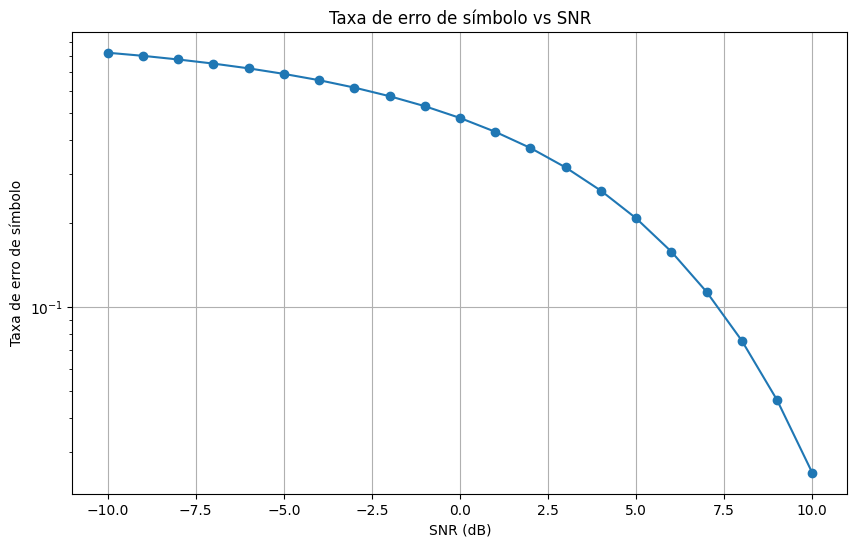

In [3]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################
# Parâmetros da simulação, considerando os parametros
# apresentados nos resultados do experimento

n_iterations = 100000                 #quantidade de iterações
snr_db_range = np.arange(-10, 11, 1)  # Range de SNR em dB
gamma = 1                             # valor de gamma conforme a eq. 17
################################################################################

################################################################################
# Função para calcular PQuatMod, de acordo com a equação 17 do artigo
def calculate_PQuatMod(M, Q):
    return 1 - (1 - (4*M - 1)**2 * (Q * (M - 16 * gamma)))**4
################################################################################

################################################################################
# Função para simular a transmissão e calcular a taxa de erro de símbolo
def simulate_transmission(M, Q, snr_db):
    snr = 10**(snr_db / 10)  # Convertendo dB para escala linear
    noise_power = 1 / snr    # Potência do ruído
    error_count = 0

    for _ in range(n_iterations):
        # Gerando os símbolos aleatórios
        symbols = np.random.randint(0, M, size=Q)

        # Adicionando ruído AWGN ao sinal
        noise = np.sqrt(noise_power / 2) * (np.random.randn(Q) + 1j * np.random.randn(Q))
        received_symbols = symbols + noise

        # Calculando PQuatMod
        PQuatMod = calculate_PQuatMod(M, Q)

        # Decisão de detecção simples
        decoded_symbols = np.round(received_symbols.real) % M

        # Contando os erros de símbolo
        error_count += np.sum(decoded_symbols != symbols)

    # Calculando a taxa de erro de símbolo
    symbol_error_rate = error_count / (n_iterations * Q)
    return symbol_error_rate
################################################################################

################################################################################
# Simulando para diferentes valores de SNR, e M=16 (16-QuatMod)
symbol_error_rates = []
for snr_db in snr_db_range:
    symbol_error_rate = simulate_transmission(M=16, Q=100, snr_db=snr_db)
    symbol_error_rates.append(symbol_error_rate)
################################################################################

################################################################################
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.semilogy(snr_db_range, symbol_error_rates, marker='o')
plt.title('Taxa de erro de símbolo vs SNR')
plt.xlabel('SNR (dB)')
plt.ylabel('Taxa de erro de símbolo')
plt.grid(True)
plt.show()
################################################################################